In [1]:
import re
import nltk
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

In [2]:

df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding="ISO-8859-1", header=None)
df.columns = ["sentiment", "id", "date", "flag", "user", "text"]
df['sentiment'] = df['sentiment'].map({0:"Negative", 4:"Positive"})
df.head()

,sentiment,id,date,flag,user,text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:

df = df[['sentiment','text']]
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [4]:

df.shape

(1600000, 2)

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  object
 1   text       1600000 non-null  object
dtypes: object(2)
memory usage: 24.4+ MB


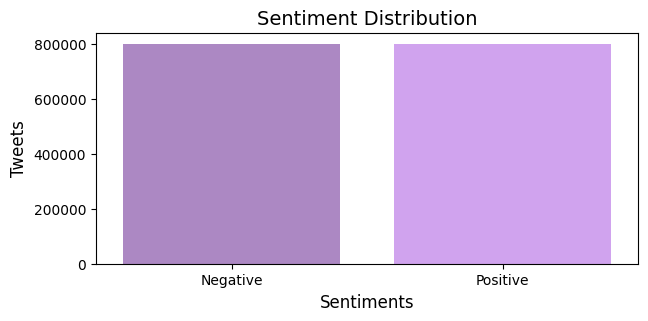

In [6]:

plt.figure(figsize=(7,3))
colors = sns.dark_palette("#d397fa", n_colors=10, input='rgb')
sns.countplot(data=df, x='sentiment', palette=[colors[7], colors[9]])
plt.xlabel("Sentiments", size=12)
plt.ylabel('Tweets', size=12)
plt.title("Sentiment Distribution", size=14)
plt.show()

In [7]:

random_index = [random.randint(0, df.shape[0]) for i in range(10)]
for i in df['text'].loc[random_index]:
    print(i)

ready 4 work, headache  will be fine! good morning to all!!
i hope my angel feels better  and im so sorry u have to go thru all this all the time  soon everything will be better ! i love you
@danadee006 ha i hope so too ! 
basketball is my lifeeeeeeeee 
@neddings way to go with that increase in profile value  tickles me
i feel sick, say nice things 
@djackmanson No crumpets.  Though there's toast I think and overpriced hashbrowns.
@LimeIce ,Try this song. you might Love it.   I hear it all the time,whenever i am upset. :smilingly: ? http://blip.fm/~78o4e
sleepy and a little frustrated. looks like my kuma bear pattern needs a bit of tweaking. keep messing up on the count 
gave Conner his 1st bottle today in preparation for returning to work. 


In [8]:

mention_pattern = r'@\S+|#\S+' 
url_pattern = r"https?:(?:www\.)?\S+"  
non_alphanumeric_pattern = r"[^A-Za-z0-9\s]+"  

In [9]:

def data_cleaning(text):
     
    lower_text = str.lower(text)
    
    
    clean_text = re.sub(mention_pattern + '|' + url_pattern + '|' + non_alphanumeric_pattern, ' ', lower_text)
    
    return clean_text

In [10]:

df['text'] = df['text'].apply(data_cleaning)

In [11]:
import re

In [12]:


def word_tokenize(text):
    token = re.findall( "[\w]+",text)
    return token 

df["tokenized text"] = df['text'].apply(word_tokenize)




In [13]:
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))


df['clean_tokens'] = df['tokenized text'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
# # To Avoid Error that might occur, if we try running lematization
# !unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [15]:
from nltk.stem import WordNetLemmatizer


nltk.download('wordnet')
nltk.download('omw-1.4') 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:

lemmatizer = WordNetLemmatizer()


df['lemmatized text'] = df['clean_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(token, pos='v') for token in tokens])


In [17]:
df.head

<bound method NDFrame.head of         sentiment                                               text  \
0        Negative        awww  that s a bummer   you shoulda got ...   
1        Negative  is upset that he can t update his facebook by ...   
2        Negative    i dived many times for the ball  managed to ...   
3        Negative    my whole body feels itchy and like its on fire    
4        Negative    no  it s not behaving at all  i m mad  why a...   
...           ...                                                ...   
1599995  Positive  just woke up  having no school is the best fee...   
1599996  Positive  thewdb com   very cool to hear old walt interv...   
1599997  Positive  are you ready for your mojo makeover  ask me f...   
1599998  Positive  happy 38th birthday to my boo of alll time  tu...   
1599999  Positive                                     happy            

                                            tokenized text  \
0        [awww, that, s, a, bummer, you, sh

In [18]:
df.head(10)

,sentiment,text,tokenized text,clean_tokens,lemmatized text
0,Negative,awww that s a bummer you shoulda got ...,"[awww, that, s, a, bummer, you, shoulda, got, ...","[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, get, david, carr, thir..."
1,Negative,is upset that he can t update his facebook by ...,"[is, upset, that, he, can, t, update, his, fac...","[upset, update, facebook, texting, might, cry,...","[upset, update, facebook, texting, might, cry,..."
2,Negative,i dived many times for the ball managed to ...,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, 50, ...","[dive, many, time, ball, manage, save, 50, res..."
3,Negative,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]","[whole, body, feel, itchy, like, fire]"
4,Negative,no it s not behaving at all i m mad why a...,"[no, it, s, not, behaving, at, all, i, m, mad,...","[behaving, mad, see]","[behave, mad, see]"
5,Negative,not the whole crew,"[not, the, whole, crew]","[whole, crew]","[whole, crew]"
6,Negative,need a hug,"[need, a, hug]","[need, hug]","[need, hug]"
7,Negative,hey long time no see yes rains a bit onl...,"[hey, long, time, no, see, yes, rains, a, bit,...","[hey, long, time, see, yes, rains, bit, bit, l...","[hey, long, time, see, yes, rain, bite, bite, ..."
8,Negative,nope they didn t have it,"[nope, they, didn, t, have, it]",[nope],[nope]
9,Negative,que me muera,"[que, me, muera]","[que, muera]","[que, muera]"


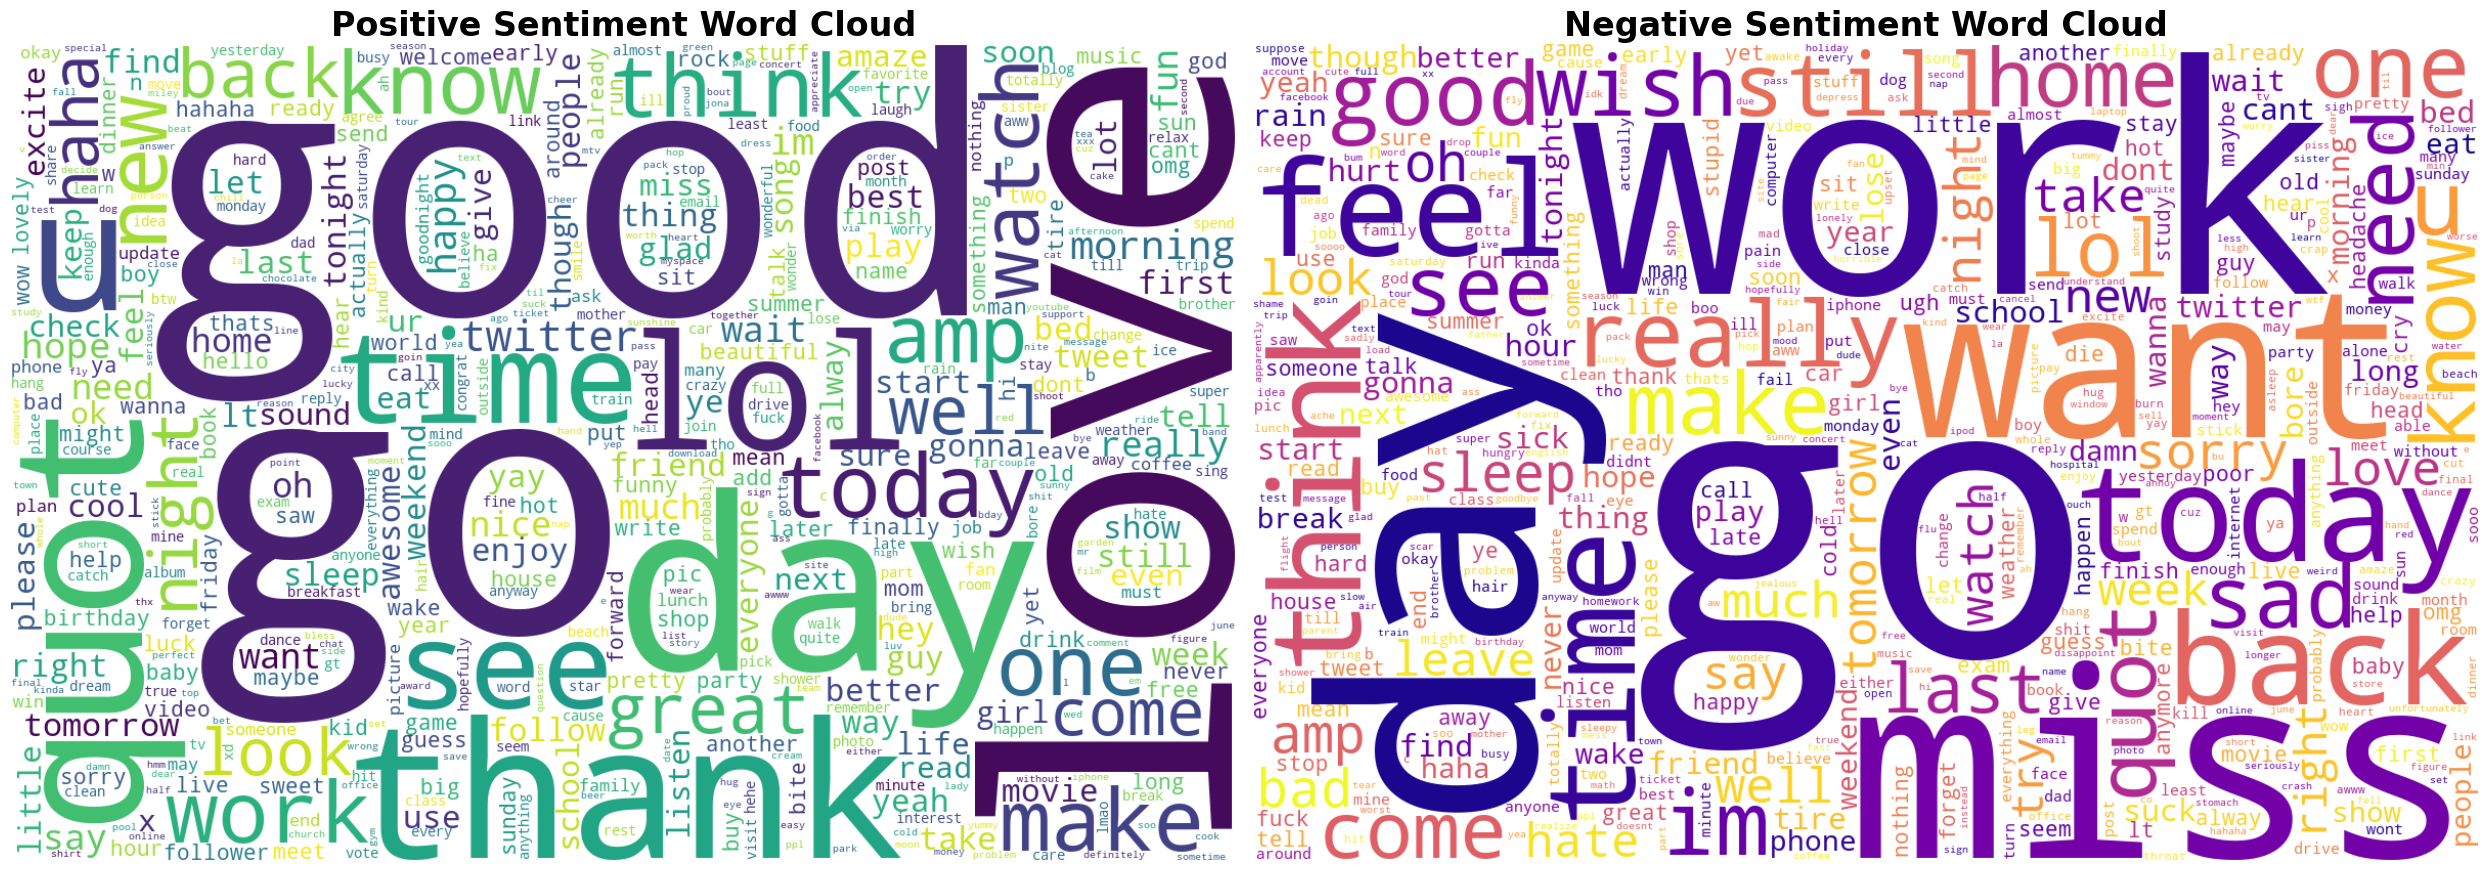

In [19]:


positive = df[df['sentiment'] == 'Positive']['lemmatized text']
negative = df[df['sentiment'] == 'Negative']['lemmatized text']


positive_data = " ".join([" ".join(tokens) for tokens in positive])
negative_data = " ".join([" ".join(tokens) for tokens in negative])


wc_positive = WordCloud(max_words=500, width=1200, height=800, background_color='white', colormap='viridis',
                        contour_color='black', contour_width=1, collocations=False, random_state=42).generate(positive_data)

wc_negative = WordCloud(max_words=500, width=1200, height=800, background_color='white', colormap='plasma',
                        contour_color='black', contour_width=1, collocations=False, random_state=42).generate(negative_data)


fig, axes = plt.subplots(1, 2, figsize=(25, 10))


axes[0].imshow(wc_positive, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Positive Sentiment Word Cloud", fontsize=24, fontweight='bold')


axes[1].imshow(wc_negative, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Negative Sentiment Word Cloud", fontsize=24, fontweight='bold')

plt.tight_layout()
plt.show()


In [20]:

df['no_of_charcters'] = df['lemmatized text'].apply(len)


df['no_of_words'] = df['lemmatized text'].apply(len)



df['no_of_characters'] = df['lemmatized text'].apply(lambda tokens: len(" ".join(tokens)))



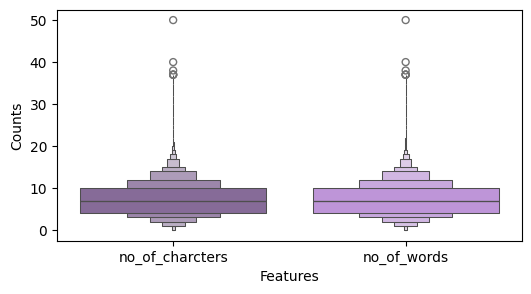

In [21]:

plt.figure(figsize=(6,3))
colors = sns.dark_palette("#d397fa", n_colors=10, input='rgb')
sns.boxenplot(df[['no_of_charcters', 'no_of_words']], palette=[colors[5], colors[8]])
plt.xlabel("Features")
plt.ylabel("Counts")
plt.show()

In [22]:

df = df[(df['no_of_charcters']<100) & (df['no_of_words']<20)]

In [23]:

X = df['lemmatized text']
y = df['sentiment'].map({"Negative":0, "Positive":1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
lemmatizer = WordNetLemmatizer()


def lemmatize_tokens(tokens):
    return " ".join([lemmatizer.lemmatize(word, pos='v') for word in tokens])


X_train= X_train.apply(lemmatize_tokens)


In [25]:
X_test= X_test.apply(lemmatize_tokens)

In [26]:
print(X_train.head())

494243     forget reformatting pc delete internet fave li...
202515                  sure hope good major change come way
1467705                   journey finale wow know thank come
1281032    yay happy b day graham hope u great day republ...
206281     work double fridays leave much worse hangover ...
Name: lemmatized text, dtype: object


In [27]:

vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train)

TfidfVectorizer(ngram_range=(1, 2))

In [28]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [29]:
print(X_train)

  (0, 2637837)	0.22677187848892516
  (0, 2633554)	0.07114899548434428
  (0, 2172344)	0.23832218613960288
  (0, 2172336)	0.2071312766029638
  (0, 1972284)	0.23832218613960288
  (0, 1972160)	0.13167103814367687
  (0, 1853655)	0.12325602276100107
  (0, 1845738)	0.23832218613960288
  (0, 1845687)	0.23832218613960288
  (0, 1845646)	0.30899424763242883
  (0, 1531235)	0.22001538164148599
  (0, 1531187)	0.11229657829764747
  (0, 1351705)	0.23832218613960288
  (0, 1351346)	0.11330896470080215
  (0, 982886)	0.23832218613960288
  (0, 981428)	0.10259790533573661
  (0, 909430)	0.23832218613960288
  (0, 909216)	0.1375513670334677
  (0, 706130)	0.21522157083824742
  (0, 706108)	0.14950034373662066
  (0, 694550)	0.23832218613960288
  (0, 694305)	0.13067710593922086
  (0, 251134)	0.2115032023009018
  (0, 250763)	0.1322340501958881
  (0, 131149)	0.23832218613960288
  :	:
  (1196764, 2199004)	0.22083149755485473
  (1196764, 2031034)	0.2666765007835844
  (1196764, 2030526)	0.13381025620265036
  (1196764, 

In [30]:
from sklearn.naive_bayes import MultinomialNB



models = {
    
    "Naive Bayes": MultinomialNB()
}

model_performance = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    training_accuracy = accuracy_score(y_train, y_train_pred)
    testing_accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred, average='weighted')
    precision = precision_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    model_performance[model_name] = {
        "Training Accuracy": training_accuracy,
        "Testing Accuracy": testing_accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1 Score": f1
    }
    
    print(f"Model: {model_name}")
    print(f"Training Accuracy: {training_accuracy}")
    print(f"Testing Acciracy: {testing_accuracy}")
    print("--"*20)

Model: Naive Bayes
Training Accuracy: 0.8929047115309091
Testing Acciracy: 0.7730959937030296
----------------------------------------


In [31]:

print(vectorizer.inverse_transform(X_test)[:10])
print(y_test.tolist()[:10])
print(y_test_pred.tolist()[:10])

[array(['watch free', 'watch', 'free'], dtype='<U119'), array(['yeah sure', 'yeah', 'sure', 'singapore', 'haha yeah', 'haha',
       'breeze', 'afternoon'], dtype='<U119'), array(['weekend let', 'weekend', 'week fo', 'week', 'snap get', 'snap',
       'sho', 'park next', 'park', 'order', 'next week', 'next',
       'life weekend', 'life', 'let park', 'let', 'huge order', 'huge',
       'get huge', 'get', 'fo sho', 'fo'], dtype='<U119'), array(['tumblr theme', 'tumblr', 'think mine', 'think', 'theme think',
       'theme', 'mine'], dtype='<U119'), array(['today', 'morning finals', 'morning', 'good morning', 'good',
       'finals today', 'finals'], dtype='<U119'), array(['love'], dtype='<U119'), array(['worse', 'things much', 'things', 'scar fly', 'scar', 'much worse',
       'much', 'make things', 'make', 'ive always', 'ive', 'fly make',
       'fly', 'always scar', 'always'], dtype='<U119'), array(['total pain', 'total', 'thank', 'pain happy', 'pain', 'happy'],
      dtype='<U119'), a

In [32]:

df_performance = pd.DataFrame(model_performance).T
df_performance.reset_index(inplace=True)
df_performance.rename(columns={'index': 'Model'}, inplace=True)
df_performance.style.background_gradient(cmap='Purples')

,Model,Training Accuracy,Testing Accuracy,Recall,Precision,F1 Score
0,Naive Bayes,0.892905,0.773096,0.773096,0.773610,0.772998


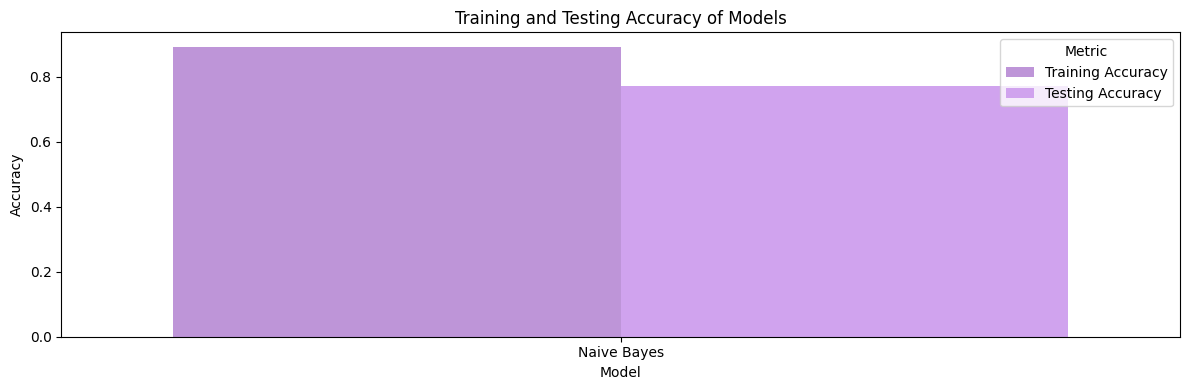

In [33]:
df_melted = df_performance.melt(id_vars='Model', value_vars=['Training Accuracy', 'Testing Accuracy'],
                                var_name='Metric', value_name='Score')


plt.figure(figsize=(12, 4))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette=[colors[8], colors[9]])
plt.title('Training and Testing Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [34]:
def process_input_and_predict(custom_text):
    
    lemmatized_input = [lemmatizer.lemmatize(word.lower()) for word in custom_text.split()]
    lemmatized_input_str = ' '.join(lemmatized_input)  
    
    
    vectorized_input = vectorizer.transform([lemmatized_input_str])
    
    
    prediction = model.predict(vectorized_input)[0]
    
    
    return "Positive" if prediction == 1 else "Negative"


custom_text = "i really love this job"
predicted_sentiment = process_input_and_predict(custom_text)

print(f'Predicted Sentiment: {predicted_sentiment}')

Predicted Sentiment: Positive


In [35]:
import joblib

joblib.dump(model,"model.joblib")
joblib.dump(vectorizer,"vectorize.joblib")
joblib.dump(lemmatizer,"lemma.joblib")

['lemma.joblib']